In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Steepest Descent

In [2]:
def vector_length(x):
    return np.sqrt(x@x)

In [3]:
def Golden_Section(f, a, b, epsilon):
    gamma = (1 + np.sqrt(5))/2  
    c = 1/gamma
    
    x = b - c*(b-a) # defining the x_0
    y = a + c*(b-a) # defining the y_0
    
    fx = f(x)       # defining the f(x_0)
    fy = f(y)       # defining the f(y_0)

    while abs(b-a) > epsilon:
        if fx > fy: 
            a = x
            x = y
            fx = fy 
            
            y = a + c*(b-a) 
            fy = f(y)
            
        else:
            b = y  
            y = x  
            fy = fx  
            
            x = b - c*(b-a)
            fx = f(x)
         
    return x

Question 1

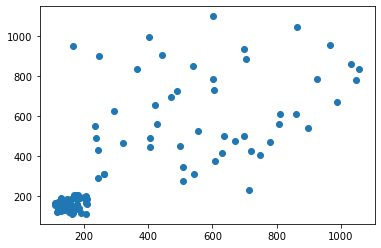

In [4]:
df = pd.read_csv('training.dat', names=['x','y'], sep=' ')
x_data = df['x']
y_data = df['y']
plt.scatter(x_data, y_data)

In [5]:
def predict(w, X):          #M: # of data N: # of features
    return X @ w            #w -> (N+1,1)  & pred -> (M,1)

def sse(w, X, y): 
    pred = predict(w, X)                #pred -> (M,1)
    sse = np.sum(np.power(y - pred,2))  #y -> (M,1) & sse = (1)
    return sse

def sse_gradient(w, X, y):
    pred = predict(w, X)                   
    dw = 2*(pred-y).T @ X          #(y-pred).T -> (1,M) dw -> (1,N+1)
    return dw

def sse_hessian(X):
    return X.T @ X      #output -> ()    

In [6]:
def NewtonMethod_LinearRegression(w_0, X, y, epsilon_gradient=1e-3, epsilon_x=1e-6, max_it=1500):
    list_w = [w_0]    #hold w values
    
    X_ = np.insert(X, 0, 1, axis=1)         #X -> (M,N) & X_ -> (M,N+1)

    H = np.linalg.inv(sse_hessian(X_))      #calculate hessian once, since it doesn't depend on w

    for it in range(max_it):
        w = list_w[it]              #take new w from the previous iteration

        df_k = sse_gradient(w, X_, y)        #calculate the gradient of sse at w
        if vector_length(df_k) <= epsilon_gradient:
            break                   #stop when the gradient is close enough to zero

        d_k = -H @ df_k             #calculate the direction
        
        def f_line(a):
            return sse(w+a*d_k, X_, y)       #this function is for the exact line search below
        alpha = Golden_Section(f_line, -100, 100, epsilon_x) #find the alpha that minimizes f_line
        
        w_new = w + alpha * d_k     #find new w
        list_w.append(w_new)        #store new w

    return np.array(list_w)

In [1]:
def Plot_NN(w, X, y):
    X_ = np.insert(X, 0, 1, axis=1)
    pred = [predict(w, W, x_) for x_ in X]
    plt.scatter(X, pred)
    plt.scatter(X, y)
    plt.show()

Part A

In [8]:
X_A = np.array([x_data]).T
def f_part_a(w):
    return calc_sse(w, X_A, y_data)
def df_part_a(w):
    return sse_gradient(w, X_A, y_data)

output = NewtonMethod_LinearRegression(w_0=np.zeros(2), X=X_A, y=y_data)

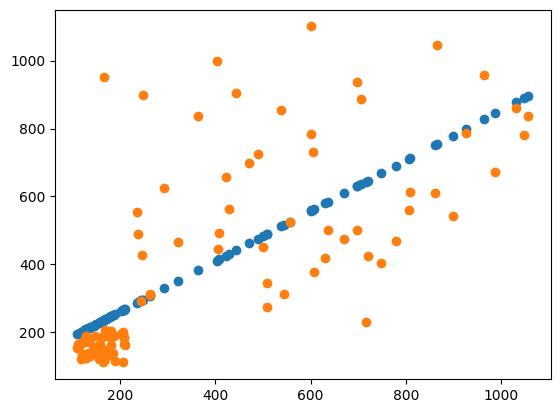

3835642.725020589


In [22]:
w_A = output[-1]
Plot_LinearRegression(w_A, X_A)

Part B

In [24]:
X_B = np.array([x_data, np.power(x_data,2)]).T
def f_part_a(w):
    return calc_sse(w, X_B, y_data)
def df_part_a(w):
    return sse_gradient(w, X_B, y_data)

output = NewtonMethod_LinearRegression(w_0=np.zeros(3), X=X_B, y=y_data)

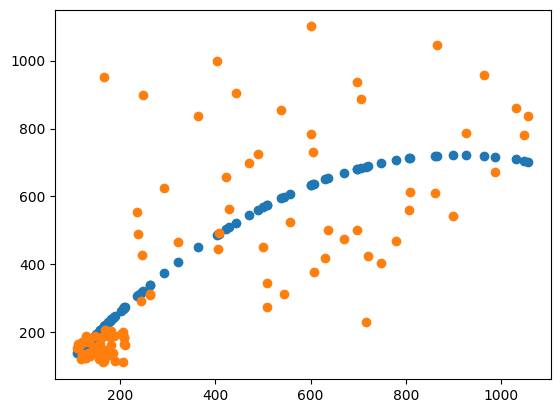

3493767.9524190486


In [25]:
w_B = output[-1]
Plot_LinearRegression(w_B, X_B)

In [26]:
w_B.astype('object')

array([-33.79296092042247, 1.6593235544025906, -0.0009105592812097141],
      dtype=object)